In [1]:
import ast
import csv
import json
import reverse_geocoder as rg

import numpy as np
import pandas as pd

import pycountry_convert

import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles

import plotly
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.express as px

In [1]:
def country_to_countrycode(country):
    if pd.isna(country):
        return np.nan
    else:
        try:
            return pycountry_convert.country_name_to_country_alpha2(country)
        except:
            return np.nan

def countrycode_to_continent(country_code):
    if pd.isna(country_code):
        return np.nan
    else:
        try:
            return pycountry_convert.country_alpha2_to_continent_code(country_code)
        except:
            return np.nan

## Loading datasets

**FAIRsharing**

In [3]:
fairsharing_df = pd.read_csv('../data/raw/FAIRsharingDBrec_summary20210304.csv', 
                             delimiter='|', header=0,
                             names=['full_name', 'short_name', 'fs_url', 'url', 'countries', 'subjects'])
fairsharing_df['subjects'] = fairsharing_df.subjects.str.split(pat=',')
fairsharing_df['countries'] = fairsharing_df.countries.str.split(pat=',')
fairsharing_df.head()

full_name  short_name  \
0                                            GenBank     GenBank   
1                                          GlycoNAVI   GlycoNAVI   
2                                           ADHDgene    ADHDgene   
3  Allele frequency resource for research and tea...      ALFRED   
4               Animal Transcription Factor Database  AnimalTFDB   

                                              fs_url  \
0  https://fairsharing.org/10.25504/FAIRsharing.9...   
1  https://fairsharing.org/10.25504/FAIRsharing.w...   
2  https://fairsharing.org/10.25504/FAIRsharing.m...   
3  https://fairsharing.org/10.25504/FAIRsharing.y...   
4  https://fairsharing.org/10.25504/FAIRsharing.e...   

                                           url  \
0        https://www.ncbi.nlm.nih.gov/genbank/   
1                       https://glyconavi.org/   
2                     http://adhd.psych.ac.cn/   
3                   http://alfred.med.yale.edu   
4  http://bioinfo.life.hust.edu.cn/AnimalTFDB/   

                                countries  \
0  [European Union, Japan, United States]   
1                                 [Japan]   
2                                 [China]   
3                         [United States]   
4                                 [China]   

                                            subjects  
0  [Bioinformatics, Data Management, Data Submiss...  
1  [Chemistry, Glycomics, Life Science, Organic C...  
2                     [Biomedical Science, Genetics]  
3                                     [Life Science]  
4                                     [Life Science]

In [4]:
fairsharing_df.describe()

full_name short_name                               fs_url  \
count       1752       1752                                 1752   
unique      1752       1741                                 1752   
top      SoyBase        CGD  https://fairsharing.org/bsg-d001065   
freq           1          3                                    1   

                       url        countries        subjects  
count                 1752             1749            1690  
unique                1752              178             834  
top     https://ada.edu.au  [United States]  [Life Science]  
freq                     1              588             367

**re3data**

In [42]:
re3data_df = pd.read_csv('../data/raw/re3data_opendoar.csv')
re3data_df = re3data_df[(re3data_df.id.str.contains('re3data'))].reset_index()
re3data_df.head()

index                                                 id  \
0      4  10|re3data_____::3f2e20af26ead0432f5470d8b739638d   
1      7  10|re3data_____::e1db3f9d2fa6c8d8067bc471ab50bdfc   
2     13  10|re3data_____::59521daca59ac29b811343cc4cd370cf   
3     14  10|re3data_____::ec1ba1674c852466c266acb64c618d15   
4     19  10|re3data_____::2ada591fb1bc9aee72a6d3e0c1ae8a76   

                                                 url  \
0                   http://planttfdb.cbi.pku.edu.cn/   
1                        https://spdf.gsfc.nasa.gov/   
2                         http://card.westgis.ac.cn/   
3                     https://www.psycharchives.org/   
4  https://www.ihfc-iugg.org/products/global-heat...   

                                       official_name  \
0                Plant Transcription Factor Database   
1                        Space Physics Data Facility   
2  Cold and Arid Regions Science Data Center at L...   
3                                      Psycharchives   
4  The Global Heat Flow Database of the Internati...   

                                        english_name description  latitude  \
0                                          PlantTFDB         NaN       0.0   
1            NASA's Space Physics Data Facility SPDF         NaN       0.0   
2  CARD WDC for Glaciology and Geocryology World ...         NaN       0.0   
3                                                NaN         NaN       0.0   
4                   International Heat-flow Database         NaN       0.0   

   longitude                                           subjects  \
0        0.0  ['Life Sciences', 'Basic Biological and Medica...   
1        0.0  ['Natural Sciences', 'Astrophysics and Astrono...   
2        0.0  ['Natural Sciences', 'Geosciences (including G...   
3        0.0  ['Humanities and Social Sciences', 'Psychology...   
4        0.0  ['Natural Sciences', 'Geology and Palaeontolog...   

                      type  dataprovider  
0  datarepository::unknown          True  
1  datarepository::unknown          True  
2  datarepository::unknown          True  
3  datarepository::unknown          True  
4  datarepository::unknown          True

In [6]:
re3data_df.describe(include='all')

index                                                 id  \
count   2693.000000                                               2693   
unique          NaN                                               2693   
top             NaN  10|re3data_____::11b64a5229ae3a1ba4da3c9e1743a808   
freq            NaN                                                  1   
mean    4443.650947                                                NaN   
std     2518.294468                                                NaN   
min        4.000000                                                NaN   
25%     2266.000000                                                NaN   
50%     4506.000000                                                NaN   
75%     6660.000000                                                NaN   
max     8705.000000                                                NaN   

                         url  \
count                   2673   
unique                  2661   
top     http://figshare.com/   
freq                       2   
mean                     NaN   
std                      NaN   
min                      NaN   
25%                      NaN   
50%                      NaN   
75%                      NaN   
max                      NaN   

                                            official_name english_name  \
count                                                2693         2034   
unique                                               2668         2010   
top     Mansfeld's World Database of Agriculture and H...         GCMD   
freq                                                    2            2   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

                                              description     latitude  \
count                                                  38  2693.000000   
unique                                                 38          NaN   
top     JEDI is an educational data archive service th...          NaN   
freq                                                    1          NaN   
mean                                                  NaN     0.114497   
std                                                   NaN     4.585469   
min                                                   NaN     0.000000   
25%                                                   NaN     0.000000   
50%                                                   NaN     0.000000   
75%                                                   NaN     0.000000   
max                                                   NaN   234.000000   

          longitude                                           subjects  \
count   2693.000000                                               2693   
unique          NaN                                               1427   
top             NaN  ['Humanities and Social Sciences', 'Life Scien...   
freq            NaN                                                209   
mean       0.067998                                                NaN   
std        2.447173                                                NaN   
min        0.000000                                                NaN   
25%        0.000000                                                NaN   
50%        0.000000                                                NaN   
75%        0.000000                                                NaN   
max      123.000000                                                NaN   

                           type dataprovider  
count                     

**OpenDOAR**

In [7]:
opendoar_df = pd.read_csv('../data/raw/re3data_opendoar.csv')
opendoar_df = opendoar_df[(opendoar_df.id.str.contains('opendoar'))].reset_index()
opendoar_df.head()

index                                                 id  \
0      0  10|opendoar____::e833e042f509c996b1b25324d56659fb   
1      1  10|opendoar____::f621585df244e9596dc70a39b579efb1   
2      2  10|opendoar____::437d7d1d97917cd627a34a6a0fb41136   
3      3  10|opendoar____::d840cc5d906c3e9c84374c8919d2074e   
4      5  10|opendoar____::4ba3c163cd1efd4c14e3a415fa0a3010   

                                                 url  \
0                          http://www.bilbao.net/bld   
1       https://researchdirect.westernsydney.edu.au/   
2         http://redress.lancs.ac.uk/Learning_Space/   
3  http://digitallibrary.usc.edu/search/controlle...   
4                 http://www.ufgd.edu.br:8080/jspui/   

                                       official_name  \
0                  BLD - Bilboko Liburutegi Digitala   
1                      Western Sydney ResearchDirect   
2                           Learning Space Catalogue   
3                                USC Digital Library   
4  Repositório de Divulgação das Produções Cientí...   

                                        english_name  \
0                  BLD - Bilboko Liburutegi Digitala   
1                      Western Sydney ResearchDirect   
2                                                NaN   
3                                USC Digital Library   
4  Repositório de Divulgação das Produções Cientí...   

                                         description   latitude   longitude  \
0  BLD is a repository of digital documents, desi...  43.256699   -2.924100   
1                                                NaN   0.000000    0.000000   
2  This repository is a Social Science e-Science ...  54.010760   -2.784990   
3  This is an institutional repository providing ...  34.052200 -118.242996   
4  This site provides access to the research outp... -22.221800  -54.806400   

                                            subjects  \
0                                                 []   
1                                                 []   
2  ['Social Sciences General', 'Science General',...   
3                                                 []   
4                                                 []   

                            type  dataprovider  
0  pubsrepository::institutional         False  
1  pubsrepository::institutional         False  
2        pubsrepository::unknown         False  
3  pubsrepository::institutional         False  
4  pubsrepository::institutional         False

In [8]:
opendoar_df.describe(include='all')

index                                                 id  \
count   6014.000000                                               6014   
unique          NaN                                               6014   
top             NaN  10|opendoar____::6e3197aae95c2ff8fcab35cb730f6a86   
freq            NaN                                                  1   
mean    4312.407549                                                NaN   
std     2510.699848                                                NaN   
min        0.000000                                                NaN   
25%     2129.250000                                                NaN   
50%     4297.000000                                                NaN   
75%     6476.750000                                                NaN   
max     8706.000000                                                NaN   

                                       url                     official_name  \
count                                 6013                              6014   
unique                                5953                              5946   
top     http://harp.lib.hiroshima-u.ac.jp/  OpenKnowledge Ecology Repository   
freq                                     3                                 3   
mean                                   NaN                               NaN   
std                                    NaN                               NaN   
min                                    NaN                               NaN   
25%                                    NaN                               NaN   
50%                                    NaN                               NaN   
75%                                    NaN                               NaN   
max                                    NaN                               NaN   

       english_name                                        description  \
count          5500                                               5776   
unique         5413                                               4920   
top            AURA  This site provides access to the research outp...   
freq              4                                                 98   
mean            NaN                                                NaN   
std             NaN                                                NaN   
min             NaN                                                NaN   
25%             NaN                                                NaN   
50%             NaN                                                NaN   
75%             NaN                                                NaN   
max             NaN                                                NaN   

            latitude    longitude subjects                           type  \
count    6014.000000  6014.000000     6014                           6014   
unique           NaN          NaN      201                              5   
top              NaN          NaN       []  pubsrepository::institutional   
freq             NaN          NaN     5273                           5368   
mean       38.649393     7.810948      NaN                            NaN   
std       788.406173    71.689788      NaN                            NaN   
min       -79.029999  -683.103027      NaN                            NaN   
25%         4.644632   -49.273300      NaN                            NaN   
50%        37.930449     4.788870      NaN                            NaN   
75%        47.294400    30.685501      NaN                            NaN   
max     61138.800781   178.438995      NaN                            NaN   

       dataprovider  
count          6014  
unique            1  
top           False  
freq           6014  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

## Basic cleaning

**re3data**

In [9]:
re3data_df.subjects

0       ['Life Sciences', 'Basic Biological and Medica...
1       ['Natural Sciences', 'Astrophysics and Astrono...
2       ['Natural Sciences', 'Geosciences (including G...
3       ['Humanities and Social Sciences', 'Psychology...
4       ['Natural Sciences', 'Geology and Palaeontolog...
                              ...                        
2688    ['Life Sciences', 'Basic Biological and Medica...
2689    ['Natural Sciences', 'Atmospheric Science and ...
2690    ['Natural Sciences', 'Atmospheric Science and ...
2691    ['Natural Sciences', 'Atmospheric Science and ...
2692    ['Life Sciences', 'Plant Sciences', 'Plant Gen...
Name: subjects, Length: 2693, dtype: object

In [10]:
re3data_df['subjects'] = re3data_df.subjects.apply(lambda x: ast.literal_eval(x))

In [11]:
def merge_lists(lists):
    res = []
    for l in lists:
        res = res + l
    return res

re3data_cleaned_subjects = re3data_df.explode('subjects').subjects.str.split(',| and ', expand=True)\
                                .apply(lambda row: row.dropna().tolist(), axis=1)\
                                .reset_index()\
                                .groupby('index')[0].apply(lambda x: merge_lists(x))

In [12]:
re3data_cleaned_subjects

index
0       [Life Sciences, Basic Biological, Medical Rese...
1       [Natural Sciences, Astrophysics, Astronomy, Ph...
2       [Natural Sciences, Geosciences (including Geog...
3       [Humanities, Social Sciences, Psychology, Soci...
4       [Natural Sciences, Geology, Palaeontology, Geo...
                              ...                        
2688    [Life Sciences, Basic Biological, Medical Rese...
2689    [Natural Sciences, Atmospheric Science, Oceano...
2690    [Natural Sciences, Atmospheric Science, Oceano...
2691    [Natural Sciences, Atmospheric Science, Oceano...
2692    [Life Sciences, Plant Sciences, Plant Genetics...
Name: 0, Length: 2693, dtype: object

In [13]:
re3data_df = re3data_df.join(re3data_cleaned_subjects)

In [14]:
re3data_df.drop(columns=['subjects'], inplace=True)
re3data_df.rename(columns={0:'subjects'}, inplace=True)

**OpenDOAR**

In [15]:
opendoar_df.subjects

0                                                      []
1                                                      []
2       ['Social Sciences General', 'Science General',...
3                                                      []
4                                                      []
                              ...                        
6009                                ['Multidisciplinary']
6010                                                   []
6011                           ['Business and Economics']
6012    ['Earth and Planetary Sciences', 'Ecology and ...
6013                                                   []
Name: subjects, Length: 6014, dtype: object

In [16]:
opendoar_df['subjects'] = opendoar_df.subjects.apply(lambda x: ast.literal_eval(x))

In [17]:
opendoar_cleaned_subjects = opendoar_df.explode('subjects').subjects.str.split(',| and ', expand=True)\
                                .apply(lambda row: row.dropna().tolist(), axis=1)\
                                .reset_index()\
                                .groupby('index')[0].apply(lambda x: merge_lists(x))

In [18]:
opendoar_cleaned_subjects

index
0                                                      []
1                                                      []
2       [Social Sciences General, Science General, Com...
3                                                      []
4                                                      []
                              ...                        
6009                                  [Multidisciplinary]
6010                                                   []
6011                                [Business, Economics]
6012    [Earth, Planetary Sciences, Ecology, Environme...
6013                                                   []
Name: 0, Length: 6014, dtype: object

In [19]:
opendoar_df = opendoar_df.join(opendoar_cleaned_subjects)

In [20]:
opendoar_df.drop(columns=['subjects'], inplace=True)
opendoar_df.rename(columns={0: 'subjects'}, inplace=True)

## Subjects analysis

In [21]:
fairsharing_subjects = fairsharing_df.explode('subjects')
re3data_subjects = re3data_df.explode('subjects')
opendoar_subjects = opendoar_df.explode('subjects')

In [22]:
data1 = fairsharing_subjects.groupby('subjects')[['url']].count().sort_values('url', ascending=False)
data2 = re3data_subjects.groupby('subjects')[['url']].count().sort_values('url', ascending=False)
data3 = opendoar_subjects.groupby('subjects')[['url']].count().sort_values('url', ascending=False)

plot = [
    go.Bar(
        x=data1.index,
        y=data1['url'],
        name='FAIRsharing'
    ),
    go.Bar(
        x=data2.index,
        y=data2['url'],
        name='re3data',
        visible = 'legendonly'
    ),
    go.Bar(
        x=data3.index,
        y=data3['url'],
        name='OpenDOAR',
        visible = 'legendonly'
    )
]

layout = go.Layout(
    title='Subject coverage',
    xaxis=dict(tickangle=45, tickfont=dict(size=12))
)

fig = go.Figure(plot, layout).show()

In [23]:
len(fairsharing_subjects.subjects.unique())

311

In [24]:
len(re3data_subjects.subjects.unique())

414

In [25]:
len(opendoar_subjects.subjects.unique())

64

In [26]:
opendoar_subjects.subjects.unique()

array([nan, 'Social Sciences General', 'Science General', 'Computers',
       'IT', 'Physics', 'Astronomy', 'Multidisciplinary', 'Arts',
       'Humanities General', 'Philosophy', 'Religion', 'Business',
       'Economics', 'Law', 'Politics', 'Psychology', 'Health', 'Medicine',
       'History', 'Archaeology', 'Education', 'Technology General',
       'Library', 'Information Science', 'Earth', 'Planetary Sciences',
       'Geography', 'Regional Studies', 'Architecture', 'Ecology',
       'Environment', 'Electrical', 'Electronic Engineering', 'Biology',
       'Biochemistry', 'Mathematics', 'Statistics', 'Civil Engineering',
       'Agriculture', ' Food', 'Veterinary', 'Language', 'Literature',
       'Chemistry', 'Chemical Technology', 'Mechanical Engineering',
       'Materials', 'Fine', 'Performing Arts', 'Management', 'Planning',
       ' Language', ' Health', 'Veterinary ', ' Technology General',
       'Medicine ', ' History', 'IT ', ' Law', 'Social Sciences General ',
       ' Sc

## Geographic analysis

**FAIRsharing**

In [2]:
fairsharing_countries = fairsharing_df.explode('countries')
fairsharing_countries['countrycode'] = fairsharing_countries.countries.map(lambda c: country_to_countrycode(c))
fairsharing_countries['continent'] = fairsharing_countries.countrycode.map(lambda cc: countrycode_to_continent(cc))

NameError: name 'fairsharing_df' is not defined

In [3]:
fairsharing_countries[fairsharing_countries.countrycode.isna()].countries.unique()

NameError: name 'fairsharing_countries' is not defined

In [29]:
fairsharing_countries[fairsharing_countries.continent.isna()].countries.unique()

array(['European Union', 'Republic of Ireland', 'Worldwide', 'Antarctica',
       nan], dtype=object)

Manually fixing exceptions

In [30]:
fairsharing_countries.loc[fairsharing_countries.countries == 'Republic of Ireland', ['countries', 'countrycode', 'continent']] = ['Ireland', 'IE', 'EU']
fairsharing_countries.loc[fairsharing_countries.countries == 'Antarctica', ['countrycode', 'continent']] = ['AQ', np.nan]
fairsharing_countries.loc[fairsharing_countries.countries == 'European Union', ['countrycode', 'continent']] = ['EU', 'EU']

In [31]:
fairsharing_countries[fairsharing_countries.countrycode == 'AQ']

full_name  \
915  Antabif IPT - AntOBIS IPT - GBIF Belgium   

                                   short_name  \
915  Antabif IPT - AntOBIS IPT - GBIF Belgium   

                                                fs_url  \
915  https://fairsharing.org/10.25504/FAIRsharing.e...   

                             url   countries                      subjects  \
915  http://ipt.biodiversity.aq/  Antarctica  [Biodiversity, Life Science]   

    countrycode continent  
915          AQ       NaN

**re3data**

In [32]:
re3data_df[re3data_df.latitude.notna()].count()

index            2693
id               2693
url              2673
official_name    2693
english_name     2034
description        38
latitude         2693
longitude        2693
type             2693
dataprovider     2693
subjects         2693
dtype: int64

Location is basically absent in re3data

In [33]:
reverse_geocoding = pd.DataFrame(rg.search(re3data_df[['latitude', 'longitude']].apply(tuple, axis=1).tolist()))
reverse_geocoding['lat'] = reverse_geocoding['lat'].astype('float')
reverse_geocoding['lon'] = reverse_geocoding['lon'].astype('float')
reverse_geocoding['continent'] = reverse_geocoding.cc.map(countrycode_to_continent)
reverse_geocoding

Loading formatted geocoded file...


lat      lon      name   admin1 admin2  cc continent
0     4.88447 -1.75536  Takoradi  Western         GH        AF
1     4.88447 -1.75536  Takoradi  Western         GH        AF
2     4.88447 -1.75536  Takoradi  Western         GH        AF
3     4.88447 -1.75536  Takoradi  Western         GH        AF
4     4.88447 -1.75536  Takoradi  Western         GH        AF
...       ...      ...       ...      ...    ...  ..       ...
2688  4.88447 -1.75536  Takoradi  Western         GH        AF
2689  4.88447 -1.75536  Takoradi  Western         GH        AF
2690  4.88447 -1.75536  Takoradi  Western         GH        AF
2691  4.88447 -1.75536  Takoradi  Western         GH        AF
2692  4.88447 -1.75536  Takoradi  Western         GH        AF

[2693 rows x 7 columns]

In [34]:
re3data_df = re3data_df.join(reverse_geocoding)

Manual fix of null lat/lon

In [35]:
re3data_df.loc[(re3data_df.latitude == 0.0) & (re3data_df.longitude == 0.0), ['latitude', 'longitude', 'cc', 'continent']] = [np.nan, np.nan, np.nan, np.nan]

**OpenDOAR**

In [36]:
reverse_geocoding = pd.DataFrame(rg.search(opendoar_df[['latitude', 'longitude']].apply(tuple, axis=1).tolist()))
reverse_geocoding['lat'] = reverse_geocoding['lat'].astype('float')
reverse_geocoding['lon'] = reverse_geocoding['lon'].astype('float')
reverse_geocoding['continent'] = reverse_geocoding.cc.map(countrycode_to_continent)
reverse_geocoding

lat        lon         name              admin1  \
0     43.26271   -2.92528       Bilbao      Basque Country   
1      4.88447   -1.75536     Takoradi             Western   
2     53.98333   -2.78333      Galgate             England   
3     34.05223 -118.24368  Los Angeles          California   
4    -22.22111  -54.80556     Dourados  Mato Grosso do Sul   
...        ...        ...          ...                 ...   
6009  40.85631   14.24641       Napoli            Campania   
6010  38.19394   15.55256      Messina              Sicily   
6011  54.32133   10.13489         Kiel  Schleswig-Holstein   
6012  43.40785  -73.25955    Granville            New York   
6013  33.96095  -83.37794       Athens             Georgia   

                   admin2  cc continent  
0                 Bizkaia  ES        EU  
1                          GH        AF  
2              Lancashire  GB        EU  
3      Los Angeles County  US        NA  
4                Dourados  BR        SA  
...                   ...  ..       ...  
6009  Provincia di Napoli  IT        EU  
6010              Messina  IT        EU  
6011                       DE        EU  
6012    Washington County  US        NA  
6013        Clarke County  US        NA  

[6014 rows x 7 columns]

In [37]:
opendoar_df = opendoar_df.join(reverse_geocoding)

Manual fix of null lat/lon

In [38]:
opendoar_df.loc[(opendoar_df.latitude == 0.0) & (opendoar_df.longitude == 0.0), ['latitude', 'longitude', 'cc', 'continent']] = [np.nan, np.nan, np.nan, np.nan]


**Country intersection**

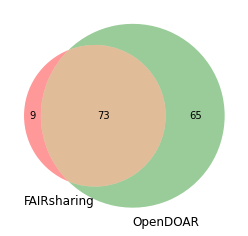

In [39]:
venn2([set(fairsharing_countries.countrycode.dropna()), set(opendoar_df.cc.dropna())], set_labels = ('FAIRsharing', 'OpenDOAR'))
plt.show()

**Country coverage**

In [40]:
data1 = fairsharing_countries.groupby('countrycode')[['url']].count().sort_values('url', ascending=False)
data2 = opendoar_df.groupby('cc')[['id']].count().sort_values('id', ascending=False)


plot = [
    go.Bar(
        x=data1.index,
        y=data1['url'],
        name='FAIRsharing'
    ),
    go.Bar(
        x=data2.index,
        y=data2['id'],
        name='OpenDOAR'
    )
]

layout = go.Layout(
    title='Country coverage',
    xaxis=dict(tickangle=45, tickfont=dict(size=12))
)

go.Figure(plot, layout).show()

**Continental coverage**

In [41]:
data1 = fairsharing_countries.groupby('continent')[['url']].count()
data2 = opendoar_df.groupby('continent')[['url']].count()

plot = [
    go.Scatterpolar(
        r=data1.url,
        theta=data1.index,
        fill='toself',
        name='FAIRsharing'),
    go.Scatterpolar(
        r=data2.url,
        theta=data2.index,
        fill='toself',
        name='OpenDOAR')
]

layout = go.Layout(polar=dict(
    radialaxis=dict(
      visible=True
    ),
  )
)

go.Figure(plot, layout).show()